In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler


C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
uni = pd.read_csv('unicorns.csv')

In [3]:
uni.head()

,Updated at,Company,Crunchbase Url,Last Valuation (Billion $),Date Joined,Year Joined,City,Country,Industry,Investors,Company Website
0,"10/31/2022, 2:37:05 AM",Esusu,https://www.cbinsights.com/company/esusu,1.0,1/27/2022,2022,New York,United States,Fintech,"[""Next Play Ventures"",""Zeal Capital Partners"",...",NaN
1,"10/31/2022, 2:37:05 AM",Fever Labs,https://www.cbinsights.com/company/fever-labs,1.0,1/26/2022,2022,New York,United States,Internet software & services,"[""Accel"",""14W"",""GS Growth""]",NaN
2,"10/31/2022, 2:37:04 AM",Minio,https://www.cbinsights.com/company/minio,1.0,1/26/2022,2022,Palo Alto,United States,Data management & analytics,"[""General Catalyst"",""Nexus Venture Partners"",""...",NaN
3,"10/31/2022, 2:37:04 AM",Darwinbox,https://www.cbinsights.com/company/darwinbox,1.0,1/25/2022,2022,Hyderabad,India,Internet software & services,"[""Lightspeed India Partners"",""Sequoia Capital ...",NaN
4,"10/31/2022, 2:37:04 AM",Pentera,https://www.cbinsights.com/company/pcysys,1.0,1/11/2022,2022,Petah Tikva,Israel,Cybersecurity,"[""AWZ Ventures"",""Blackstone"",""Insight Partners""]",NaN


In [4]:
uni.describe()

,Last Valuation (Billion $),Year Joined,Company Website
count,1199.000000,1199.000000,0.0
mean,3.225588,2020.158465,NaN
std,7.601195,1.981949,NaN
min,1.000000,2007.000000,NaN
25%,1.100000,2019.000000,NaN
50%,1.570000,2021.000000,NaN
75%,3.000000,2021.000000,NaN
max,140.000000,2022.000000,NaN


In [5]:
uni.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Updated at                  1199 non-null   object 
 1   Company                     1199 non-null   object 
 2   Crunchbase Url              1199 non-null   object 
 3   Last Valuation (Billion $)  1199 non-null   float64
 4   Date Joined                 1199 non-null   object 
 5   Year Joined                 1199 non-null   int64  
 6   City                        1181 non-null   object 
 7   Country                     1199 non-null   object 
 8   Industry                    1199 non-null   object 
 9   Investors                   1199 non-null   object 
 10  Company Website             0 non-null      float64
dtypes: float64(2), int64(1), object(8)
memory usage: 103.2+ KB


In [6]:
uni.fillna(uni.mean(numeric_only=True).round(1), inplace=True)

#For median:
uni.fillna(uni.median(numeric_only=True).round(1), inplace=True)

print(uni)

                  Updated at     Company  \
0     10/31/2022, 2:37:05 AM       Esusu   
1     10/31/2022, 2:37:05 AM  Fever Labs   
2     10/31/2022, 2:37:04 AM       Minio   
3     10/31/2022, 2:37:04 AM   Darwinbox   
4     10/31/2022, 2:37:04 AM     Pentera   
...                      ...         ...   
1194  10/31/2022, 2:32:42 AM    Fanatics   
1195  10/31/2022, 2:32:38 AM      SpaceX   
1196  10/31/2022, 2:33:10 AM  Vice Media   
1197  10/31/2022, 2:33:05 AM      Klarna   
1198  10/31/2022, 2:35:27 AM      Veepee   

                                         Crunchbase Url  \
0              https://www.cbinsights.com/company/esusu   
1         https://www.cbinsights.com/company/fever-labs   
2              https://www.cbinsights.com/company/minio   
3          https://www.cbinsights.com/company/darwinbox   
4             https://www.cbinsights.com/company/pcysys   
...                                                 ...   
1194        https://www.cbinsights.com/company/fanatics   

# outliers

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Last Valuation (Billion $)'>

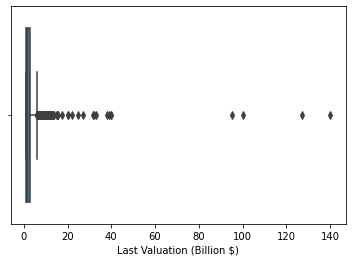

In [7]:
sns.boxplot(uni['Last Valuation (Billion $)'])

In [8]:
print(np.where(uni['Last Valuation (Billion $)']>10))

(array([ 246,  764,  765,  766,  767,  768,  769,  770,  771,  772,  773,
        774,  877,  878,  879,  880,  977,  978,  979,  980,  981,  982,
       1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076, 1077,
       1078, 1079, 1118, 1119, 1120, 1121, 1141, 1142, 1176, 1187, 1188,
       1194, 1195], dtype=int64),)


In [9]:
Q1 = np.percentile(uni['Last Valuation (Billion $)'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(uni['Last Valuation (Billion $)'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", uni.shape)
 
# Upper bound
upper = np.where(uni['Last Valuation (Billion $)'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(uni['Last Valuation (Billion $)'] <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
uni.drop(upper[0], inplace = True)
uni.drop(lower[0], inplace = True)
 
print("New Shape: ", uni.shape)

Old Shape:  (1199, 11)
New Shape:  (1081, 11)


C:\Users\User\AppData\Local\Temp\ipykernel_52580\2844036646.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(uni['Last Valuation (Billion $)'], 25,
C:\Users\User\AppData\Local\Temp\ipykernel_52580\2844036646.py:4: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(uni['Last Valuation (Billion $)'], 75,


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Last Valuation (Billion $)'>

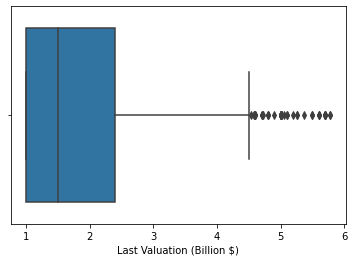

In [10]:
sns.boxplot(uni['Last Valuation (Billion $)'])

In [11]:
print(np.where(uni['Last Valuation (Billion $)']>4.5))

(array([ 241,  242,  243,  244,  724,  725,  726,  727,  728,  729,  730,
        731,  732,  733,  734,  735,  736,  737,  738,  739,  740,  741,
        742,  743,  744,  821,  822,  823,  824,  825,  826,  827,  828,
        829,  901,  902,  903,  904,  905,  906,  907,  908,  909,  910,
        911,  912,  980,  981,  982, 1018, 1034, 1036, 1079], dtype=int64),)


In [12]:
uni.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1081 entries, 0 to 1198
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Updated at                  1081 non-null   object 
 1   Company                     1081 non-null   object 
 2   Crunchbase Url              1081 non-null   object 
 3   Last Valuation (Billion $)  1081 non-null   float64
 4   Date Joined                 1081 non-null   object 
 5   Year Joined                 1081 non-null   int64  
 6   City                        1064 non-null   object 
 7   Country                     1081 non-null   object 
 8   Industry                    1081 non-null   object 
 9   Investors                   1081 non-null   object 
 10  Company Website             0 non-null      float64
dtypes: float64(2), int64(1), object(8)
memory usage: 101.3+ KB


In [13]:
corr = uni.corr()
corr

,Last Valuation (Billion $),Year Joined,Company Website
Last Valuation (Billion $),1.000000,-0.121249,NaN
Year Joined,-0.121249,1.000000,NaN
Company Website,NaN,NaN,NaN
